In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, librosa.display, IPython.display as ipd
import numpy as np
import json
from mutagen.mp3 import MP3
from statistics import mean, median
import noisereduce as nr
import sklearn
import contextlib
import wave
from scipy.io import wavfile
import os
import pandas as pd

C:\Users\Magda\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
N_FFT = 1024         # Number of frequency bins for Fast Fourier Transform
HOP_SIZE = 1024      # Number of audio frames between STFT columns
SR = 44100           # Sampling frequency
N_MELS = 40          # Mel band parameters   
WIN_SIZE = 1024      # number of samples in each STFT window
WINDOW_TYPE = 'hann' # the windowin function
FEATURE = 'mel'      # feature representation
plt.rcParams['figure.figsize'] = (10,4)

In [3]:
        filePath = 'chiffchaff.wav'
        y, sr = librosa.load(filePath,duration=20,mono=True)
        y = nr.reduce_noise(audio_clip=y, noise_clip=y, prop_decrease = 1, verbose=False)

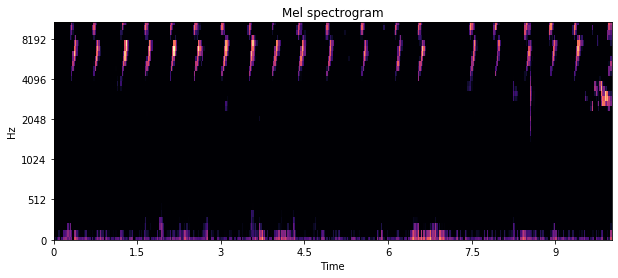

In [4]:
        plt.figure()
        librosa.display.specshow(
            librosa.core.amplitude_to_db(
                librosa.feature.melspectrogram(
                                y=y, 
                                S=np.abs(
                                    librosa.stft(
                                        y, n_fft = N_FFT, 
                                        hop_length = HOP_SIZE, 
                                        window = WINDOW_TYPE, 
                                        win_length = WIN_SIZE)
                                        )**2, 
                                sr=SR, 
                                n_fft=N_FFT, 
                                hop_length=HOP_SIZE, 
                                n_mels=N_MELS, 
                                htk=True, 
                                fmin=0.0, 
                                fmax=sr/2.0), 
                    ref=1.0),
                sr=SR,
                hop_length=HOP_SIZE, 
                x_axis='time', 
                y_axis='mel')
        plt.title('Mel spectrogram')
        plt.show()

Text(0.5, 1.0, 'Mel spectrogram - simple code')

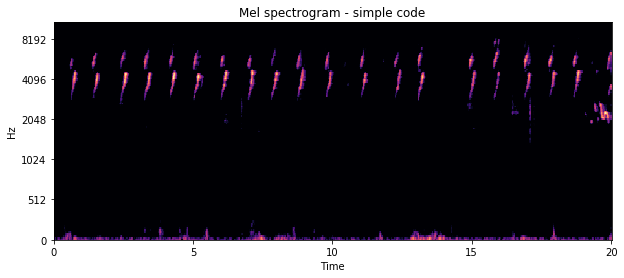

In [13]:
spectogram = librosa.display.specshow(
             librosa.core.amplitude_to_db(
                librosa.feature.melspectrogram(
                                y=y, 
                                sr=SR)),
             x_axis='time', 
             y_axis='mel')
plt.title('Mel spectrogram - simple code')

C:\Users\Magda\Anaconda3\lib\site-packages\librosa\filters.py:221: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


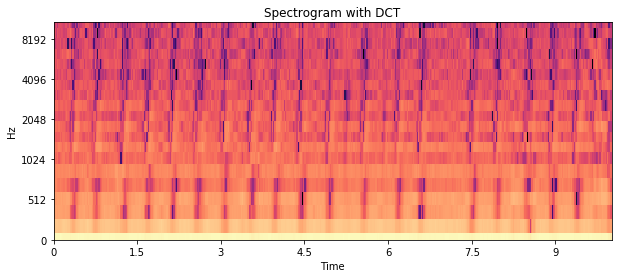

In [6]:
        plt.figure()
        librosa.display.specshow(
            librosa.core.amplitude_to_db(
                librosa.feature.mfcc(
                                dct_type=3,
                                y=y, 
                                sr=SR, 
                                n_fft=N_FFT, 
                                hop_length=HOP_SIZE, 
                            #    n_mels=N_MELS, 
                                htk=True, 
                                fmin=0.0, 
                                fmax=sr/2.0
                ), 
                    ref=1.0),
                sr=SR,
                hop_length=HOP_SIZE, 
                x_axis='time', 
                y_axis='mel')
        plt.title('Spectrogram with DCT')
        plt.show()

Text(0.5, 1.0, 'Spectral Centroid')

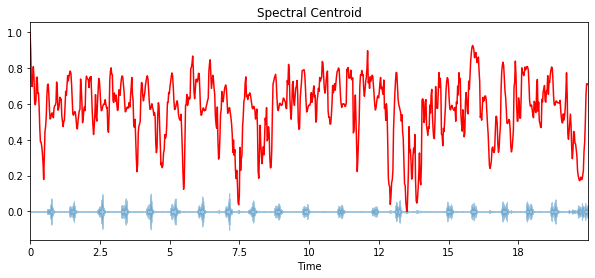

In [7]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(y=y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title('Spectral Centroid')

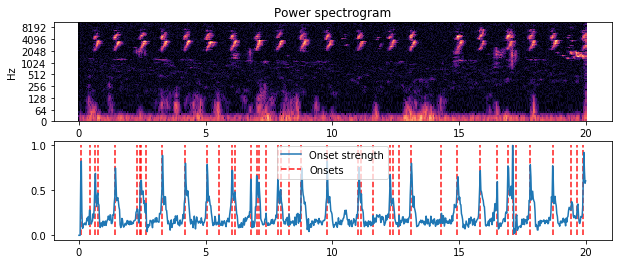

In [8]:
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
D = np.abs(librosa.stft(y))
plt.figure()
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                          x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
            linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

In [9]:
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
    return mfccsscaled

In [18]:
features = []
class_label = 'chiffchaff'
data = extract_features(filePath)
features.append([data, class_label])
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  1  files


In [19]:
featuresdf

,feature,class_label
0,"[-393.22882, 48.246582, -24.565714, 36.45036, ...",chiffchaff


In [20]:
featuresdf['feature'][0]

array([-393.22882  ,   48.246582 ,  -24.565714 ,   36.45036  ,
        -10.124076 ,   31.921272 ,   11.788473 ,   20.940514 ,
          2.7475374,   18.231735 ,    5.4057865,   13.946088 ,
          4.2008114,   18.268784 ,    4.1499996,   15.660221 ,
          7.900921 ,    7.7208037,    9.594651 ,    7.925672 ,
          4.7431827,    8.542059 ,    1.7923836,    5.913711 ,
          3.9651358,    1.3359361,    3.2458482,    2.2479978,
          3.541125 ,    3.032747 ,    2.6679251,    1.3685905,
          4.037081 ,    2.8786545,    3.412409 ,    2.4286451,
          3.3630917,    1.3605834,    3.033636 ,    0.5459539],
      dtype=float32)